In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    data = pd.read_csv('real_estate_data (1).csv', sep="\t")
except:
    data = pd.read_csv('datasets/real_estate_data.csv', sep="\t")


In [3]:
data.ceiling_height.describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [4]:
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

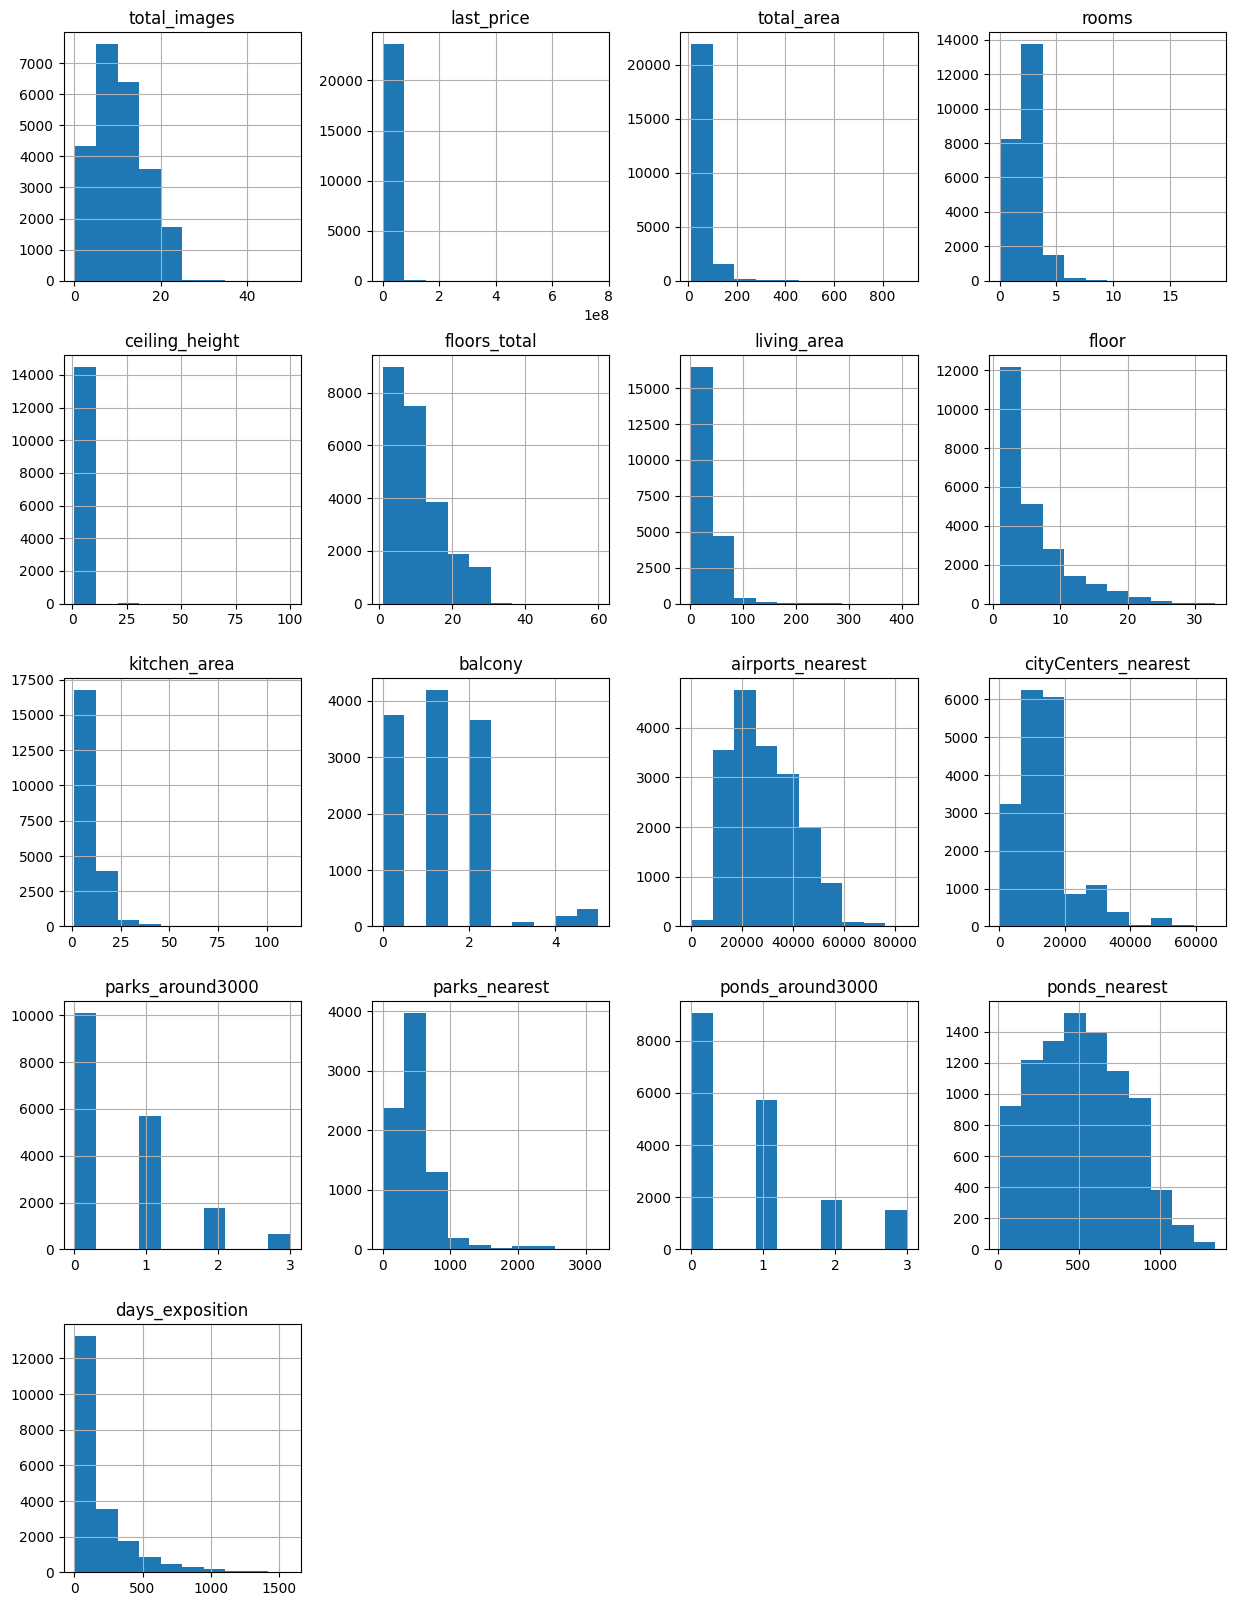

In [6]:
num_col = data.select_dtypes(include=['int','float'])
num_col.hist(figsize=(15,20))
plt.show()

В столбцах с: количеством фотографий, количеством комнат, кол-вом этажей, или расстоянием до (водоемов, аэропортов, центра города) видим распределене близкое к нормальному. Также можем заметить наличие выбросов в большем части столбцов. Также есть пропущенные значения, и некорректные типы данных для столбцов: first_day_exposition, floors_total, is_apartment, balcony, days_exposition.

# 2  Выполните предобработку данных

In [7]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
data.isnull().mean() * 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

In [9]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [10]:
filter_data = data.dropna(subset=['floors_total','locality_name'])
filter_data['floors_total'] = filter_data['floors_total'].astype('int')
display(filter_data)
filter_data.isnull().sum()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Пропуски в стобцах с растоянием(до аэропорта,водоёма, центра города), вероятно, говорят о том, что расстояние слишком большое. Заменим пропуски на 0 и будем считать,что объекты в тех объявлениях расположены слишком делеко от этого места. Пропуски в числе балконов, также говорят об их отсутсвие на объекте.

In [11]:
filter_data[filter_data.columns[-7:-1]] = filter_data[filter_data.columns[-7:-1]].fillna(0).astype('int')

Пропуски в is_apartment, вероятно означают, что квартира не является апартаментами, тоже можем заменить пропуски на 0. 
Пропуски в days_exposition мы не можем однозначно объяснить.Возможно пропуски связаны с не закрытыми  после продажи объявлениями.

In [12]:
#filter_data[['balcony','airports_nearest','cityCenters_nearest','is_apartment','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest']] = filtr_data.fillna()
#filter_data.iloc[:,-1:-8:-1] = filter_data.iloc[:,-1:-8:-1].fillna(0)
filter_data.loc[:,['balcony']] = filter_data.loc[:,['balcony']].fillna(0).astype('int')
filter_data['is_apartment'] = filter_data['is_apartment'].fillna(0).astype('bool')
display(filter_data.info())
filter_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  int64  
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest      23

None

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9084
floors_total               0
living_area             1865
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2222
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3171
dtype: int64

Рассмотрим внимательнее данные в высоте потолков:

In [13]:
filter_data.ceiling_height.describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Среднее и медиана примерно на одном уровне,что говорит нам о нормальном распрделении данных. Значит пропущеные значения мы можем заменить на медиану.

In [14]:
filter_data.ceiling_height.fillna(filter_data.ceiling_height.median(), inplace = True)
filter_data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area             1865
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2222
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3171
dtype: int64

Пропуски в столбцах с площадью не можем заменить

Переведем first_day_exposition из строкового типа в datetime


In [15]:
filter_data['first_day_exposition'] = pd.to_datetime(filter_data['first_day_exposition'])
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony              

Разберемся с неявными дубликатами в столбце locality_name. Для этого напишем функцию:


In [16]:
print(len(filter_data.locality_name.unique()))
filter_data.locality_name.unique()

364


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [17]:
def f_name(x):
    t = x.split()
    for i in t:
        if i[0].isupper():
            return x[x.index(i[0]):]
    

In [18]:
filter_data.loc[:, 'locality_name'] = filter_data.locality_name.apply(f_name)
print(len(filter_data.locality_name.unique()))
filter_data.locality_name.unique()

305


array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

В результат работы функции мы убрали ~60 неявных дубликатов


Рассмотрим столбец ceiling_height и рассмотрим разброс данных в нём:

[(0.0, 35.0)]

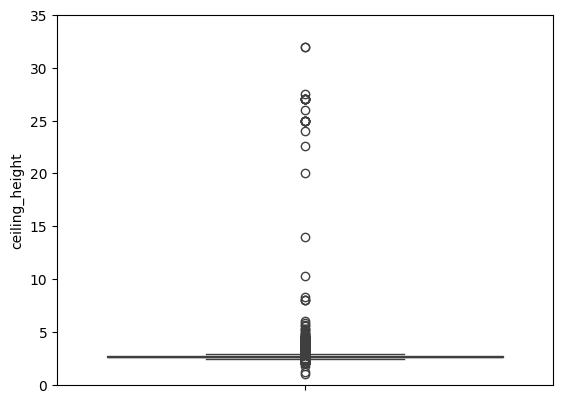

In [19]:
g = sns.boxplot(data = filter_data.ceiling_height)
g.set(ylim=(0, 35))

Как видно из графика — большая часть значений находится в пределах 5м. Но и также есть значения которые ровно в 10 раз больше нормы. Вероятно люди при составлении объявления ошибаются и указывают высоту не в метрах.

Заменим эти аномальные значения.


In [20]:
filter_data.loc[ (filter_data.ceiling_height > 25 ) & (filter_data.ceiling_height < 50 ), 'ceiling_height'] /= 10

Избавимся от строк с очевидными выбросами:

In [21]:
filter_data = filter_data.query('ceiling_height < 5 and ceiling_height >= 2.5')

<Axes: ylabel='ceiling_height'>

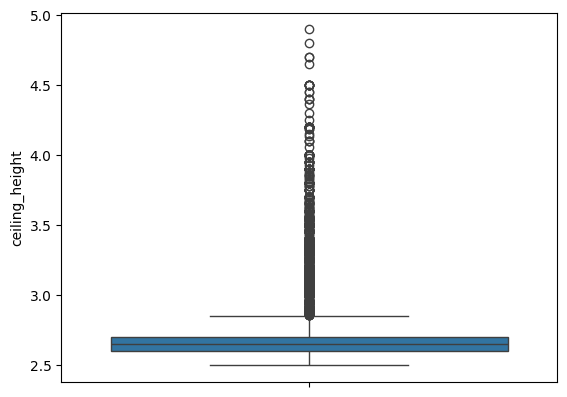

In [22]:
sns.boxplot(data = filter_data.ceiling_height)

# 3  Добавьте в таблицу новые столбцы

Добавим новый столбец price_meter2 с ценой квадратного метра. Также вытащим нужные нам характеристики из first_day_exposition.

In [23]:
#цена квадратного метра
filter_data['price_meter2'] = round(filter_data['last_price'] / data['total_area'], 2)
filter_data['price_meter2'] = filter_data['price_meter2'].astype('int')
#столбец дня недели
filter_data['weekday'] = filter_data['first_day_exposition'].dt.weekday
#столбец месяца
filter_data['month'] = filter_data['first_day_exposition'].dt.month
#столбец года
filter_data['year'] = filter_data['first_day_exposition'].dt.year
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23467 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23467 non-null  int64         
 1   last_price            23467 non-null  float64       
 2   total_area            23467 non-null  float64       
 3   first_day_exposition  23467 non-null  datetime64[ns]
 4   rooms                 23467 non-null  int64         
 5   ceiling_height        23467 non-null  float64       
 6   floors_total          23467 non-null  int64         
 7   living_area           21611 non-null  float64       
 8   floor                 23467 non-null  int64         
 9   is_apartment          23467 non-null  bool          
 10  studio                23467 non-null  bool          
 11  open_plan             23467 non-null  bool          
 12  kitchen_area          21260 non-null  float64       
 13  balcony              

Создадим функцию для нахождения типа этажа:(далее применим apply к столбцу)

In [24]:
def f_type(row):
    all_floors, cur_floor = row['floors_total'], row['floor']
    t = 'error'
    if cur_floor == 1:
        t = 'первый'
    elif cur_floor == all_floors:
        t = 'последний'
    elif 1 < cur_floor < all_floors:
        t = 'другой'
    return t

In [25]:
filter_data['floor_category'] = filter_data.apply(f_type, axis = 1)

Осталось перевести расстояние в столбце cityCenters_nearest из м в км:

In [26]:
filter_data['cityCenters_nearest_km'] = filter_data.cityCenters_nearest.apply(lambda x: round(x/1000))
filter_data.cityCenters_nearest_km

0        16
1        19
2        14
3         7
4         8
         ..
23694     4
23695     0
23696     0
23697    10
23698     0
Name: cityCenters_nearest_km, Length: 23467, dtype: int64

In [27]:
filter_data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_meter2', 'weekday', 'month',
       'year', 'floor_category', 'cityCenters_nearest_km'],
      dtype='object')

In [28]:
filter_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter2,weekday,month,year,floor_category,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482,2,755,NaN,120370,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,0,0,81.0,82920,1,12,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90,2,574,558.0,92785,3,8,2015,другой,14
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,84,3,234,424.0,408176,4,7,2015,другой,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112,1,48,121.0,100000,1,6,2018,другой,8


Нужные столбцы для дальнейшей работы мы создали и привели к нужным типам.

# 4  Проведите исследовательский анализ данных

Построим все нужные гистограммы для каждого параметра

count    23467.000000
mean        60.327681
std         35.562765
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

count    23467.000000
mean        60.327681
std         35.562765
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

count    23467.000000
mean        60.327681
std         35.562765
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

count    2.346700e+04
mean     6.533073e+06
std      1.084909e+07
min      1.219000e+04
25%      3.425000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

count    23467.000000
mean         2.070695
std          1.078795
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

count    23467.000000
mean       198.898922
std        305.335834
min          0.000000
25%          0.000000
50%          0.000000
75%        390.000000
max       1344.000000
Name: ponds_nearest, dtype: float64

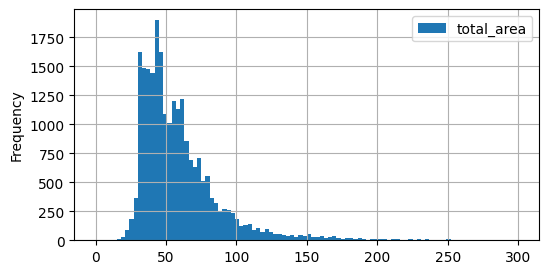

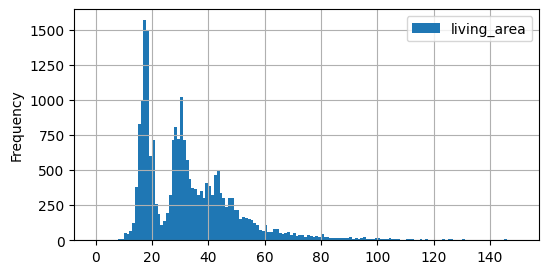

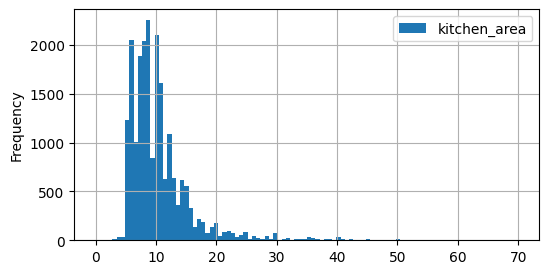

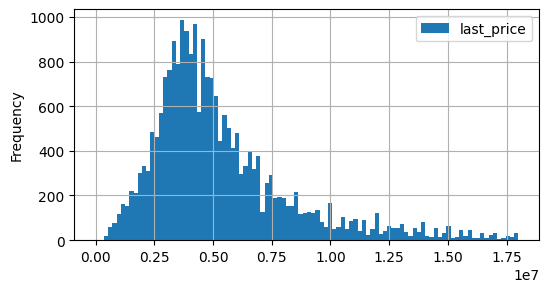

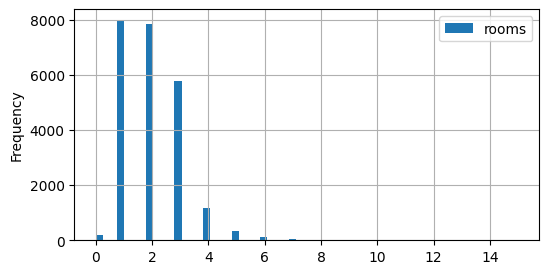

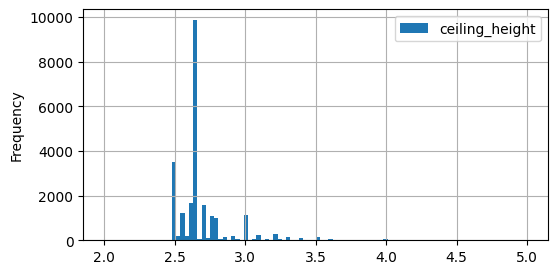

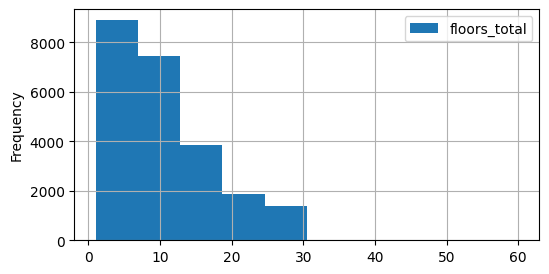

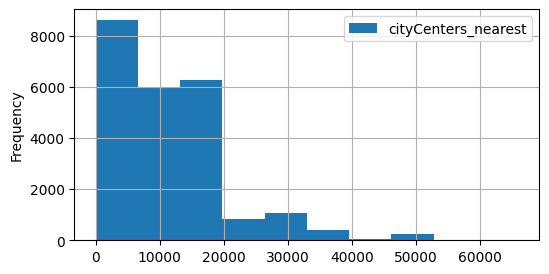

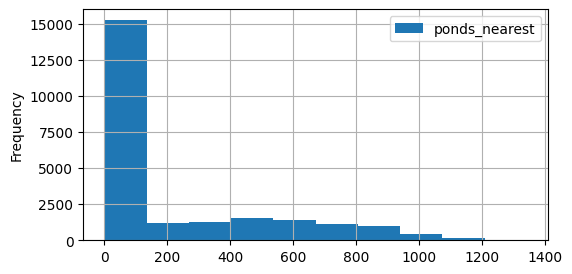

In [29]:
filter_data.plot(kind = 'hist', y = 'total_area', bins = 100, grid=True, figsize = (6,3), range = (0,300))
display(filter_data['total_area'].describe())

filter_data.plot(kind = 'hist', y = 'living_area', bins = 150, grid=True, figsize = (6,3), range = (0,150))
display(filter_data['total_area'].describe())

filter_data.plot(kind = 'hist', y = 'kitchen_area', bins = 100, grid=True, figsize = (6,3), range = (0,70))
display(filter_data['total_area'].describe())
#изучим last_price
filter_data.plot(kind = 'hist', y = 'last_price',  bins = 100, grid=True, range = (0,18000000), figsize = (6,3))
display(filter_data['last_price'].describe())
#изучим число rooms
filter_data.plot(kind = 'hist', y = 'rooms', grid=True,bins = 59, figsize = (6,3), range = (0,15))
display(filter_data['rooms'].describe())
#изучим высоту ceiling_height
filter_data.plot(kind = 'hist', y = 'ceiling_height', bins=100, range = (2,5), grid=True, figsize = (6,3))
filter_data['ceiling_height'].describe()

filter_data.plot(kind = 'hist', y = 'floors_total', grid=True, figsize = (6,3))
filter_data['floors_total'].describe()

filter_data.plot(kind = 'hist', y = 'cityCenters_nearest', grid=True, figsize = (6,3))
filter_data['cityCenters_nearest'].describe()

filter_data.plot(kind = 'hist', y = 'ponds_nearest', grid=True, figsize = (6,3))
filter_data['ponds_nearest'].describe()

count        3.000000
mean      7822.333333
std       8182.793309
min       2893.000000
25%       3099.500000
50%       3306.000000
75%      10287.000000
max      17268.000000
Name: count, dtype: float64

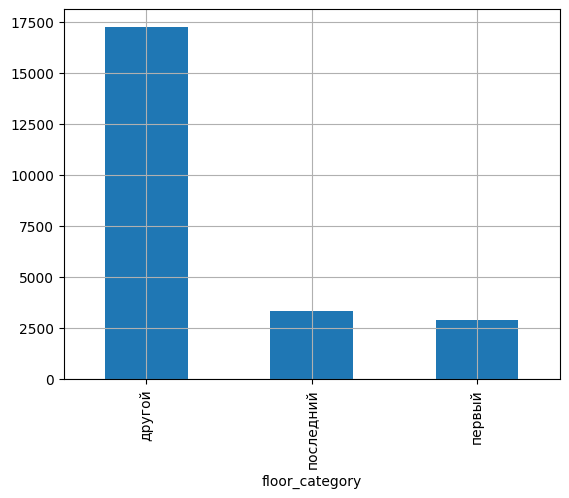

In [30]:
t = filter_data['floor_category'].value_counts()
t.plot(kind = 'bar', y = 'count', grid=True)
t.describe()

1-total_area: Распределение данных по Гауссу, имеются выбросы они незначительно влияют на общие данные(медиана рядом со средним значением(52 и 60)). 2-last_price: Очень похожая ситуация как и с площадью. Медиана - 4,6 млн, Среднее - 6.5. 3-rooms: Больше всего 1 комнатных квартир. Самыми популярными являются 1,2,3 комнатные квартиры. 4-ceiling_height Высота потолков в среднем составляет 2,77 м, медиана 2,65 м. 5- Количество этажей Больше всего 5 этажных домов, в целом их число плавно снижается и доходит до 30. 6-ponds_nearest Подавляющее число квартир имеют рядом водоемы. 7-cityCenters_nearest Большая часть квартир удалена от центра. 8-floor_category Анализируя график, видим, что квартир на последнем этаже незначительно больше, чем на первом. С остальными данными всё в порядке, мы их обработали заранее.

Изучим время продажи квартиры.

count    20311.000000
mean       180.827236
std        219.921076
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

days_exposition
847.0       1
984.0       1
657.0       1
1076.0      1
697.0       1
         ... 
90.0      200
30.0      207
7.0       233
60.0      538
45.0      872
Name: count, Length: 1139, dtype: int64

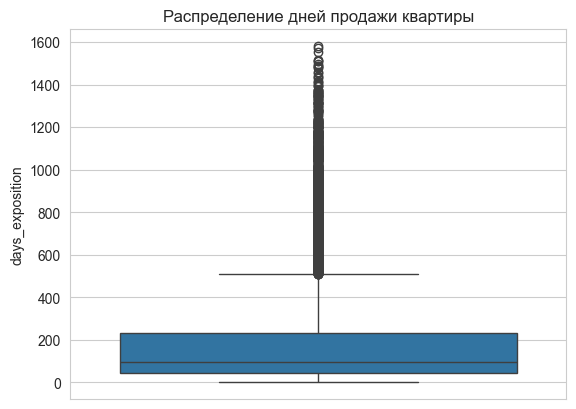

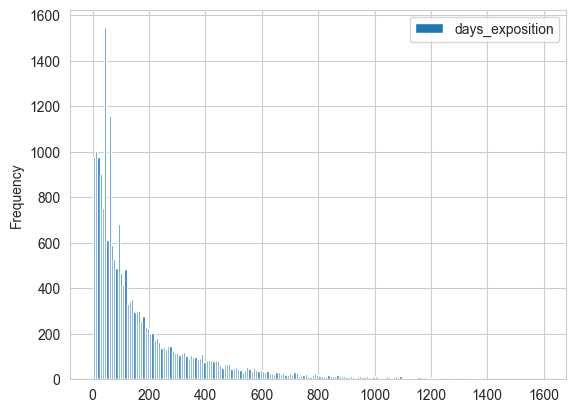

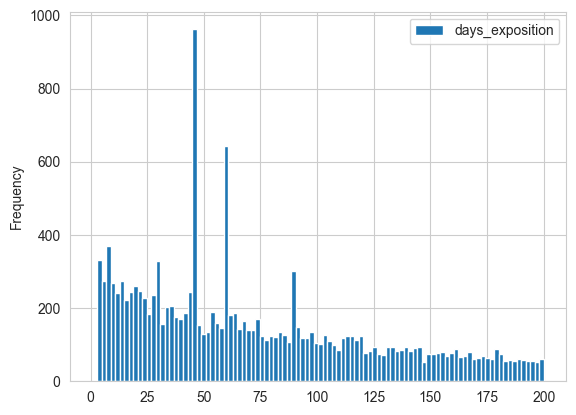

In [31]:
sns.set_style("whitegrid")
sns.boxplot(filter_data[filter_data['days_exposition']!=0.0]['days_exposition']).set(title='Распределение дней продажи квартиры')



filter_data.plot(y = 'days_exposition', kind = 'hist', bins = 200, grid = True, range = (1,1600))
filter_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

#среднее значение, медиана и межквартильный размах
display(filter_data[filter_data['days_exposition']!=0]['days_exposition'].describe())
display(filter_data['days_exposition'].value_counts().sort_values())
plt.show()

Ориентируясь на графики, мы видим явное распределение Пуассона. Среднее - 180 дней, медиана - 95 дней. Видим аномальные пики значений до 200 дней. Сделав гистограмму с ограничением по x. Видим аномалии на 45, 60, 7, 30, 90 днях.Скорее всего(уж больно они круглые), квартира не продается за эти дни, а площадка продвигает объявление в самые топы или объявление снимается. Возможно есть какие-то ограничения на дни размещения от самой площадки. Межквартильный размах - от 45 до 232 дней,но график показывает нам размах от 1 до 500 дней, значит этот диапазон и будем считать нормальным.Ориентируясь на графики, млжем сделать вывод,что быстрые продажи находятся в пределах от 0 до 1 квартиля(100 дней, долгие - больше 500(3 квартиль).

 Какие факторы больше всего влияют на стоимость квартиры?

Площадь:


np.float64(0.6519403521256952)

np.float64(0.5636494798273621)

np.float64(0.5186526043336279)

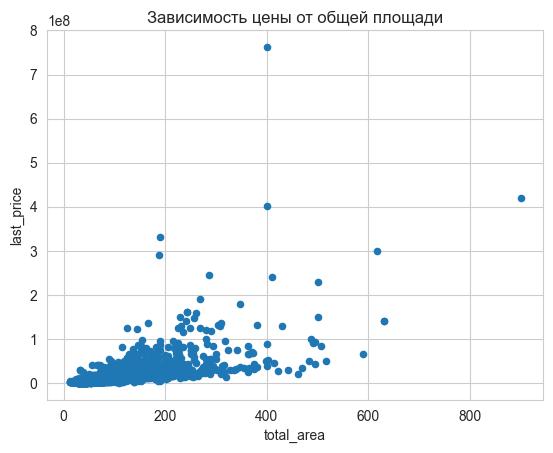

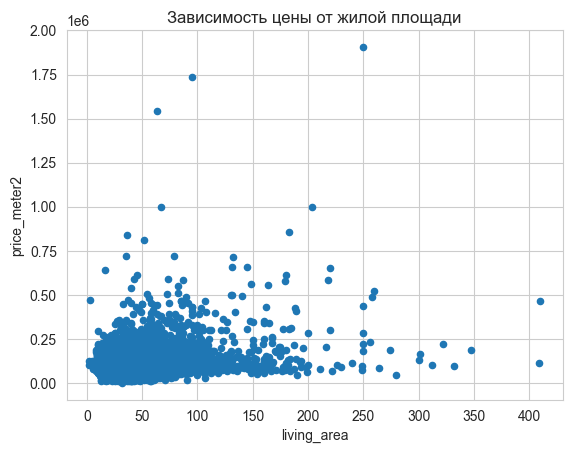

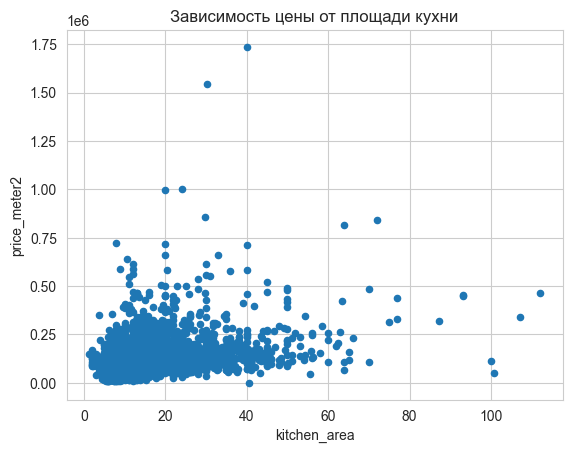

In [32]:
filter_data.plot(kind='scatter', x='total_area', y='last_price').set(title='Зависимость цены от общей площади')
display(filter_data['total_area'].corr(filter_data['last_price']))

filter_data.plot(kind='scatter', x='living_area', y='price_meter2').set(title='Зависимость цены от жилой площади')
display(filter_data['living_area'].corr(filter_data['last_price']))

filter_data.plot(kind='scatter', x='kitchen_area', y='price_meter2').set(title='Зависимость цены от площади кухни')
display(filter_data['kitchen_area'].corr(filter_data['last_price']))

Видим сильную корреляцию(0.5-0.6 по Пирсону). Говорит нам о прямом влинии площади на цену. Чем больше площадь тем выше стоимость объекта.

От числа комнат:


np.float64(0.36252159613807294)

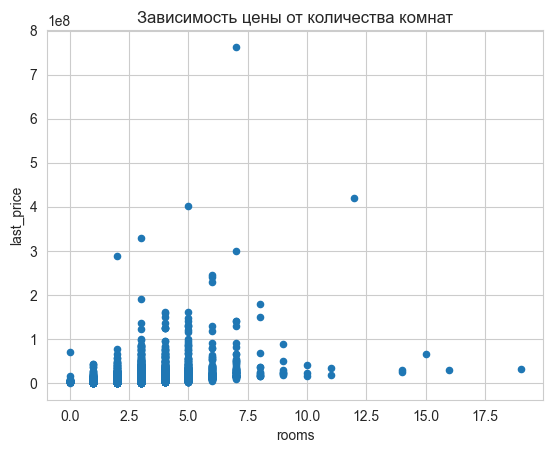

In [33]:
filter_data.plot(kind='scatter', x='rooms', y='last_price').set(title='Зависимость цены от количества комнат')
display(filter_data['rooms'].corr(filter_data['last_price']))

Видим среднюю корреляцию (0.3) . Значит количество комнат вносит свой вклад в ценообразование квартиры.

Изучим зависимость от этажа(1 или последнего)


,mean,count,median
floor_category,,,
другой,6.679075e+06,17268,4850000.0
первый,4.811509e+06,2893,3900000.0
последний,7.276969e+06,3306,4300000.0


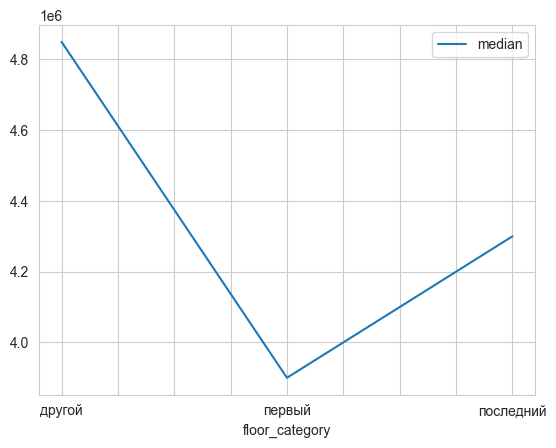

In [34]:
pt_data = filter_data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_data.columns = ['mean', 'count', 'median']
pt_data.plot(y = 'median')
pt_data

Из графика можно сделать вывод, что квартиры на 1 этаже самые дешевые, что логично. Амплитуда значений около 7%.Зависимость общей цены от этажа присутсвует, но не является основным фактором.

np.float64(-0.20626083222822256)

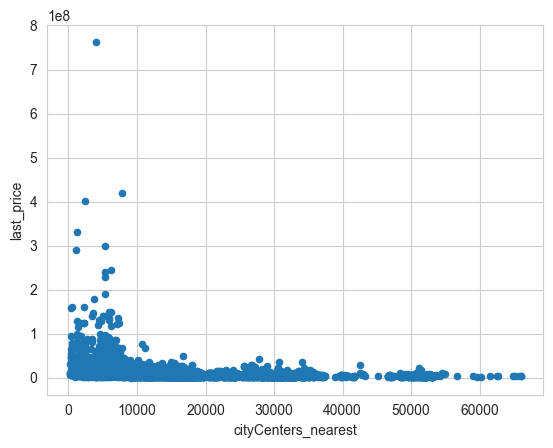

In [35]:
t = filter_data.query('cityCenters_nearest != 0')
t.plot(kind = 'scatter', y = 'last_price', x = 'cityCenters_nearest')

t['cityCenters_nearest'].corr(t['last_price'])

Замечаем среднюю обратную корреляцию. Значит, чем ближе к центру, тем дороже цена квартиры.

Зависимость от даты размещения:


<Axes: xlabel='year'>

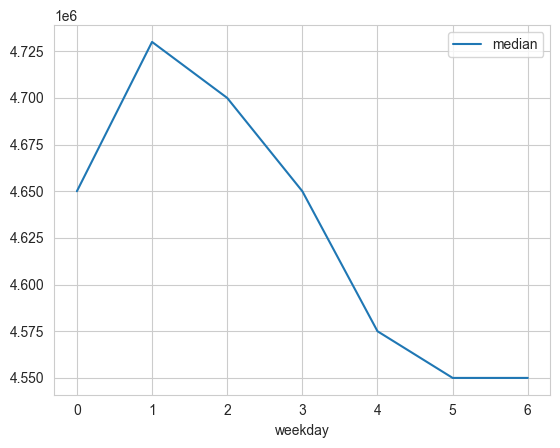

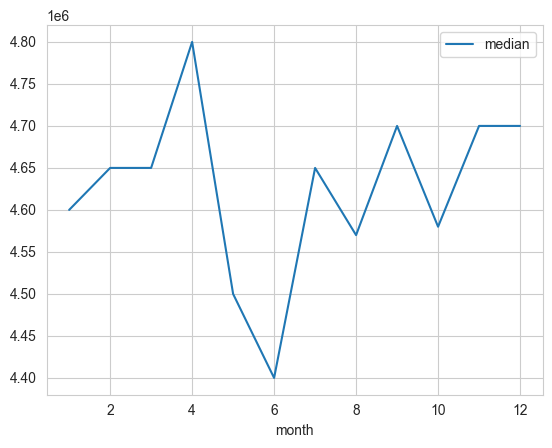

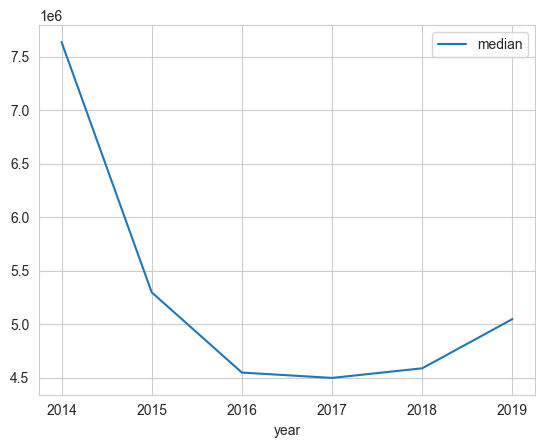

In [36]:
pt_data = filter_data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_data.columns = ['mean', 'count', 'median']
pt_data.plot(y = 'median')

pt_data = filter_data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_data.columns = ['mean', 'count', 'median']
pt_data.plot(y = 'median')

pt_data = filter_data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_data.columns = ['mean', 'count', 'median']
pt_data.plot(y = 'median')

1- В начале разберем первый график.(В зависимости от дня недели): Видим явную просадку цены c пятницы по воскресение(снижение около 1.5-2% от максимума). Можно объяснить это явление кратковременным снижением спроса. Дороже всего продаются квартиры во вторник, в разгар рабочей недели. В целом, цена незначительно зависит от дня недели.

2- График зависимости цены от месяца: Также замечаем большой спад с 5 по 6 месяц. Далее с 6-8 месяц цена возвращается в привычный диапазон. Падение можно объснять уменьшнием спроса на недвижимость в период с мая по июнь. Недвижимость-сезонный рынок, зависит от множетва факторов, в том числе от сезона отпусков.

3- График зависимости цены от года: Цена на недвижимость находилась на минимуме с 2015 по 2017 год, после цена стала восстанавливаться. Снижение можно объяснить кризисом того года, который напрямую повлиял на спрос на недвижимость. *"Резкое снижение спроса, сумбурные колебания цен, последующая стагнация рынка – чем еще запомнился 2015 год участникам рынка?"*.

Во всех случаях видим зависимость стоимости от временных метрик. В разные периоды она может колебаться, но в целом,дата размещения влияет на стоимость квартиры.


,count,mean
locality_name,,
Санкт-Петербург,15600,114799.400513
Мурино,586,86040.665529
Кудрово,469,95261.513859
Шушары,439,78550.883827
Всеволожск,397,68718.856423
Пушкин,366,103147.382514
Колпино,337,75443.548961
Парголово,326,90205.000000
Гатчина,306,68757.228758


,count,mean
locality_name,,
Санкт-Петербург,15600,114799.400513


,count,mean
locality_name,,
Выборг,235,58237.72766


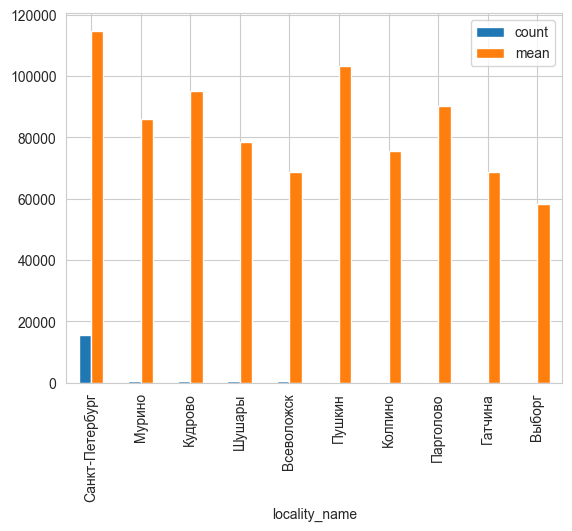

In [37]:
pt_locality = filter_data.pivot_table(index = 'locality_name', values = 'price_meter2', aggfunc=['count', 'mean'])
pt_locality.columns = ['count', 'mean']
pt_locality = pt_locality.sort_values('count', ascending = False).head(10)
display(pt_locality)
pt_locality.plot(kind='bar')
#самая высокая стоимость
display(pt_locality[pt_locality['mean']==pt_locality['mean'].max()])
#самая низкая стоимость
pt_locality[pt_locality['mean']==pt_locality['mean'].min()]

Получаем самую дорогую стоимость жилья в Санкт-Петербурге,а самую низкую - в Выборге. Очевидно, во второй столице России, огромном городе миллионике с развитой инфраструктурой, стоимость жилья будет гораздо дороже, чем в соседних населенных пунктах.

Выборг находится севернее Санкт-Петербурга. Суровый холодный климат, удаленность от больших городов дают такую низкую стоимость жилья

Стоимость кв.м в зависимости от удаления от центра для Санкт-Петербурга:


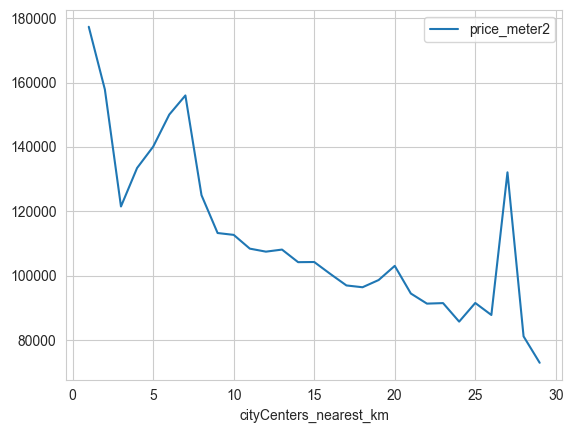

In [38]:
pivot_table_km = filter_data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=0').pivot_table(index = 'cityCenters_nearest_km', values = 'price_meter2', aggfunc = 'mean')
pivot_table_km.plot()
plt.show()

График детально нам показывает снижение цены по мере удаления от центра. Интересен пик на 27км от центра, возможно это густо населенный район/город неподалеку.

# 5  Напишите общий вывод

Мы обработали данные в датасете, заполнили пропуски, привели типы данных к удобному формату. Добавили информацию о цене за квадратный метр жилья, выделили дни недели, месяцы и года из даты размещения объявлений, а также определили категории этажей квартир. Проверили различные параметры на наличие выбивающихся значений, таких как общая площадь, жилая площадь, площадь кухни, цена, количество комнат, высота потолков, тип этажа, количество этажей в доме, расстояние до центра и ближайшего парка.

Мы выявили аномалии в продажах, предположив, что многие объявления были автоматически сняты с Яндекс Недвижимость без фактической продажи. Диаграмма размаха показала, что нормальные сроки продажи колеблются от 100 до 500 дней. Быстрые продажи ниже 100 дней, долгие - выше 500

Также мы выявили, что цена квартиры зависит от количества комнат, этажа, площади, близости к центру, и от даты размещения. Стоит отметить, что в период с 2015 по 2017 годы цены были в среднем на 20% ниже.

Важно подчеркнуть, что при анализе средних цен на квартиры за период с 2014 по 2019 годы мы не проводили детализацию рынка. Это означает, что стоимость аналогичных квартир в разные годы могла значительно отличаться. Например, в период с самыми низкими средними ценами в 2015-2017 годах, некоторые квартиры могли не потерять в стоимости.
